In [ ]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import cv2
from skimage.morphology import disk

# Task 1
Implement the morphological Dilation and Erosion on Binary images.
Show the effects of repeated applications of both Dilation and Erosion.
Note: You cannot use built-in libraries.

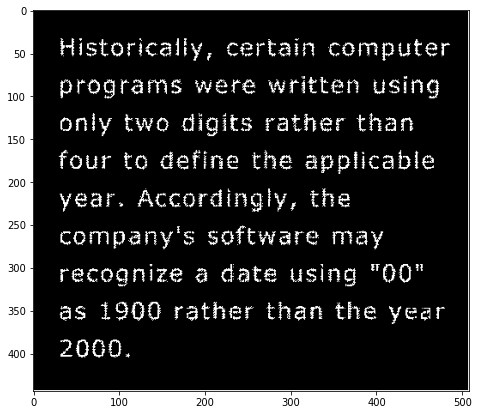

In [ ]:
img1 = Image.open('/content/drive/MyDrive/DIP3E_Original_Images_CH09/Fig0907(a)(text_gaps_1_and_2_pixels).tif')
img1 = np.array(img1)
fig = plt.figure(figsize=(10, 7))
plt.imshow(img1, origin='upper', cmap='gray')

In [ ]:
print(np.max(img1))

True


In [ ]:
def to_binary(image):
    bin_image = np.zeros(image.shape)
    if np.max(image) == True:
        bin_image[image == True] = 255
        bin_image[image == False] = 0
    else:
        bin_image[image > 127] = 255
        bin_image[image <= 127] = 0
    return bin_image

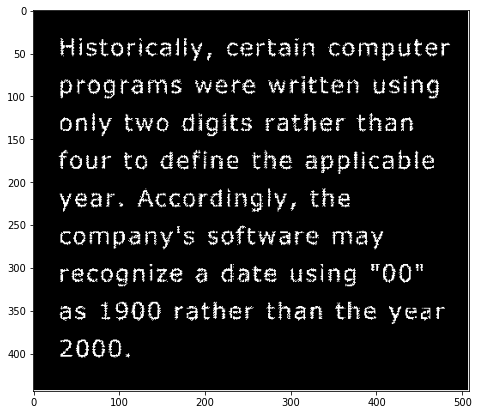

In [ ]:
bin_img1 = to_binary(img1)
fig = plt.figure(figsize=(10, 7))
plt.imshow(bin_img1, origin='upper', cmap='gray')

In [ ]:
print(np.max(bin_img1))

255.0


With $A$ and $B$ as sets in $Z^2$, the dilation of $A$ by $B$, denoted as $A \oplus B$, is defined as, $$ A \oplus B = \{z|[(\hat{B})_z \cap A] \subseteq A\}$$ In other words, the dilation of $A$ by $B$ then is the set of all displacements, $z$, such that the foreground elements of $\hat{B}$ overlap at least one element of $A$.

In [ ]:
def dilation(image, SE):
    image_array = np.array(image)
    image_matrix = to_binary(image_array)
    M, N = image_matrix.shape
    m = SE.shape[0]
    padding_dimensions = (M + m - 1, N + m - 1)
    image_originX, image_originY = (m//2, m//2)
    padded_image = np.zeros(padding_dimensions)
    padded_image[image_originX:image_originX + M, image_originY:image_originY + N] = image_matrix
    dilated_image = np.zeros(image_matrix.shape, dtype='uint8')
    for i in range(0, M):
        for j in range(0, N):
            intersection = np.sum((padded_image[i:i + m, j:j + m] / 255) * SE)
            if intersection:
                # print(intersection)
                dilated_image[i, j] = 255
    return dilated_image

The change that dilation brings in an image is that it "grows" or "thickens" objects in a binary image. The manner and extent of this thickening is controlled by the shape and size of the structuring element used.

The structuring element that will be used is a disk of size 3.
        \begin{equation}\begin{bmatrix}
        0 & 1 & 0\\
        1 & 1 & 1\\
        0 & 1 & 0
        \end{bmatrix}\end{equation}

In [ ]:
SEc3 = np.array(disk(1))
print(SEc3)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


In [ ]:
dilated_img1 = dilation(img1, SEc3)
dilated_img2 = dilation(dilated_img1, SEc3)
dilated_img3 = dilation(dilated_img2, SEc3)

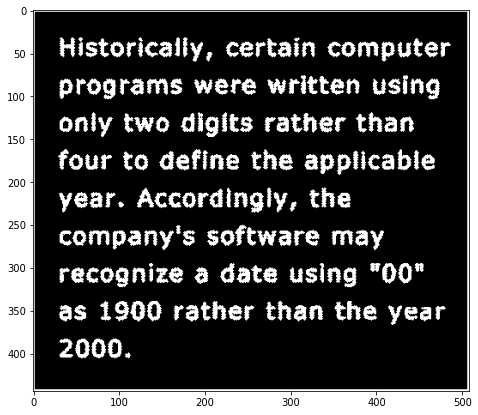

In [ ]:
fig = plt.figure(figsize=(10, 7))
plt.imshow(dilated_img1, origin='upper', cmap='gray')

Let's zoom in a bit on the word "year" written in the penultimate line of the original image and also the image that has been dilated once.

Here, we can observe with pristine perception that the gaps and broken segments have somewhat been removed. The proprietary holes of the letters are also showing a propensity to be filled with white pixels because of the thickening effect. Let's take a look below to see the effect manifest.


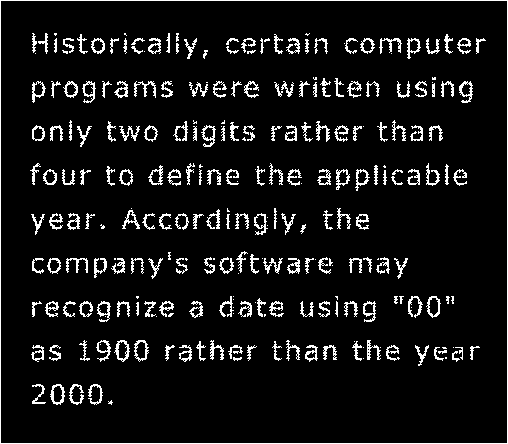
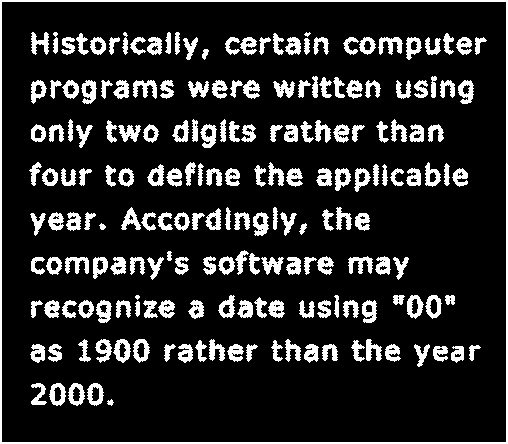
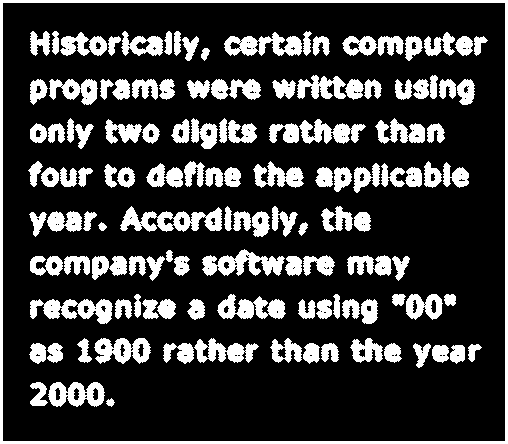
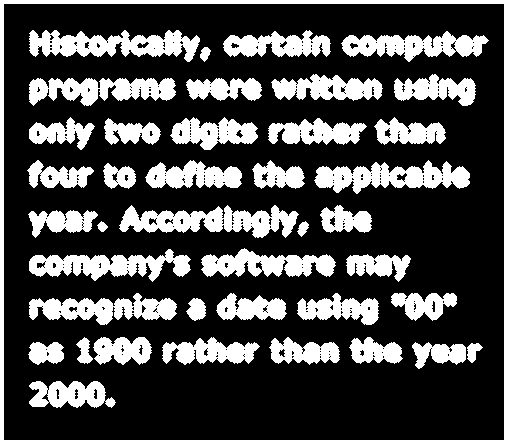

In [ ]:
fig = px.imshow(np.array([bin_img1, dilated_img1, dilated_img2, dilated_img3]), facet_col=0, binary_string=True)
fig.show()

Well, now the "ea" just looks like 2 blobs.

(-0.5, 507.5, 443.5, -0.5)

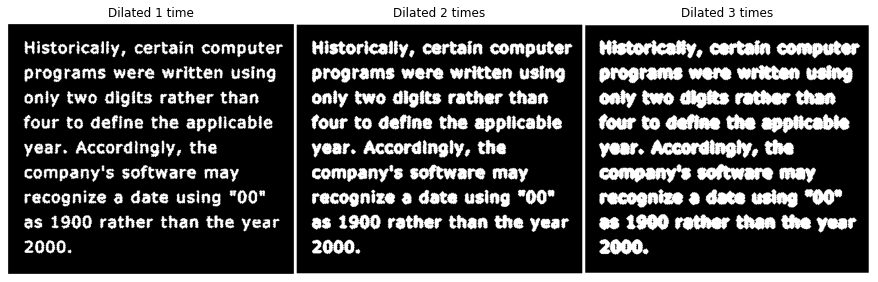

In [ ]:
fig = plt.figure(figsize=(12, 10))
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
fig.add_subplot(1, 3, 1)
plt.imshow(dilated_img1, origin='upper', cmap='gray')
plt.title('Dilated 1 time')
plt.axis('off')

fig.add_subplot(1, 3, 2)
plt.imshow(dilated_img2, origin='upper', cmap='gray')
plt.title('Dilated 2 times')
plt.axis('off')

fig.add_subplot(1, 3, 3)
plt.imshow(dilated_img3, origin='upper', cmap='gray')
plt.title('Dilated 3 times')
plt.axis('off')

As evident from the dilated images above, we can see that the miniscule gaps seen within a single alphabet keeps reducing the more we dilate an image. More precisely, all the gaps of size $\leq 2$ were eliminated because the size of the structuring element is a $3 \times 3$ disk. In the $3^{rd}$ image we can see that the adjacent alphabets have merged or are very close to merging with each other. 

With $A$ and $B$ as sets in $Z^2$, the erosion of $A$ by $B$, denoted as $A \ominus B$, is defined as, $$ A \ominus B = \{z|(B)_z \subseteq A\}$$
where $A$ is a set of foreground pixels, $B$ is a structuring element, and the $z$’s are foreground values (1’s).  In words, this equation indicates that the erosion of $A$ by $B$ is the set of all points $z$ such that $B$, translated by $z$, is contained in $A$.

In [ ]:
def erosion(image, SE):
    image_array = np.array(image)
    image_matrix = to_binary(image_array)
    M, N = image_matrix.shape
    m = SE.shape[0]
    padding_dimensions = (M + m - 1, N + m - 1)
    image_originX, image_originY = (m//2, m//2)
    padded_image = np.zeros(padding_dimensions)
    padded_image[image_originX:image_originX + M, image_originY:image_originY + N] = image_matrix
    eroded_image = np.zeros(image_matrix.shape, dtype='uint8')
    for i in range(0, M):
        for j in range(0, N):
            intersection = np.sum((padded_image[i:i + m, j:j + m] / 255) * SE)
            if intersection == np.sum(SE):
                # print(intersection)
                eroded_image[i, j] = 255
    return eroded_image

The change that erosion brings in an image is that it "shrinks" or "thins" objects in a binary image. The manner and extent of this thinning is controlled by the shape and size of the structuring element used.

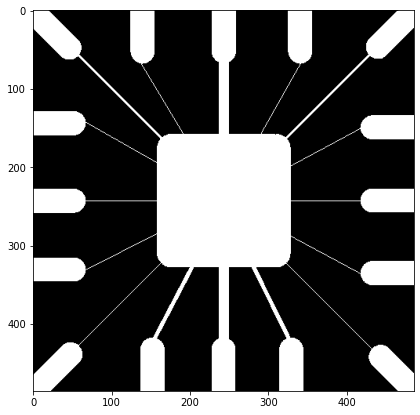

In [ ]:
img2 = Image.open('/content/drive/MyDrive/DIP3E_Original_Images_CH09/Fig0905(a)(wirebond-mask).tif')
img2 = np.array(img2)
fig = plt.figure(figsize=(10, 7))
plt.imshow(img2, origin='upper', cmap='gray')

Now, let's try out repeated dilation operations in the image shown above.

In [ ]:
print(np.max(img2))

True


The structuring elements that will be used are square structuring elements of size $11 \times 11$, $15 \times 15$, $45 \times 45$ with all 1's.
    \begin{equation}
        \begin{bmatrix} 
        1 & \dots  & 1\\
        \vdots & \ddots & \vdots\\
        1 & \dots  & 1 
        \end{bmatrix}
    \end{equation}

In [ ]:
SEList = [np.ones((k, k)) for k in [11, 15, 45]]

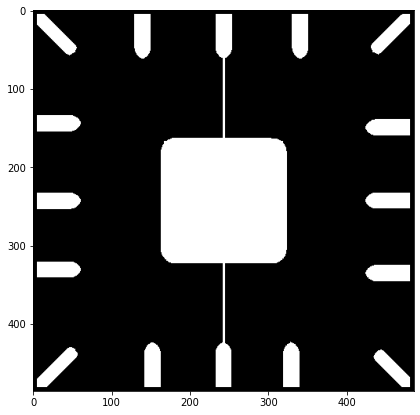

In [ ]:
eroded_img21 = erosion(img2, SEList[0])
fig = plt.figure(figsize=(10, 7))
plt.imshow(eroded_img21, origin='upper', cmap='gray')

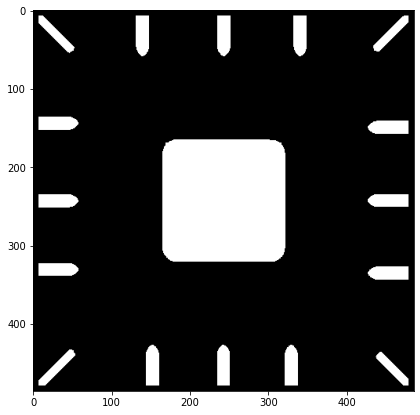

In [ ]:
eroded_img22 = erosion(img2, SEList[1])
fig = plt.figure(figsize=(10, 7))
plt.imshow(eroded_img22, origin='upper', cmap='gray')

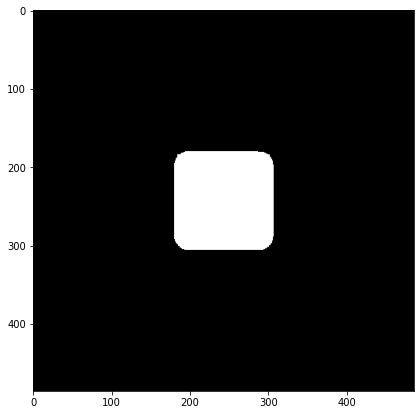

In [ ]:
eroded_img23 = erosion(img2, SEList[2])
fig = plt.figure(figsize=(10, 7))
plt.imshow(eroded_img23, origin='upper', cmap='gray')

(-0.5, 485.5, 485.5, -0.5)

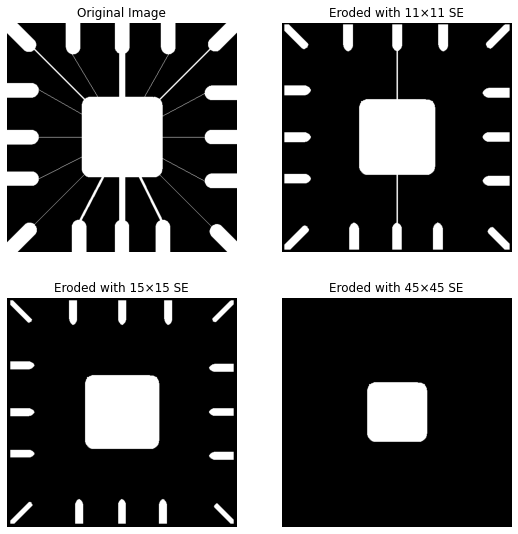

In [ ]:
fig = plt.figure(figsize=(7, 7))
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
fig.add_subplot(2, 2, 1)
plt.imshow(img2, origin='upper', cmap='gray')
plt.title('Original Image')
plt.axis('off')

fig.add_subplot(2, 2, 2)
plt.imshow(eroded_img21, origin='upper', cmap='gray')
plt.title('Eroded with 11×11 SE')
plt.axis('off')

fig.add_subplot(2, 2, 3)
plt.imshow(eroded_img22, origin='upper', cmap='gray')
plt.title('Eroded with 15×15 SE')
plt.axis('off')

fig.add_subplot(2, 2, 4)
plt.imshow(eroded_img23, origin='upper', cmap='gray')
plt.title('Eroded with 45×45 SE')
plt.axis('off')

As evident from the images above, we can see the white lines gradually vanishes as we erode the image with bigger and bigger structuring elements. The square in the middle has decreased in size and the objects at the periphery shrunk as well. All white lines except the pair of lines that are vertical vanished and those pair of vertical lines considerably decreased in thickness due to erosion with an $11 \times 11$ structuring element. This is because their width is $>11$. Increasing the size of the structuring element even more would eliminate larger components. For example, the connecting lines and the border pads can be removed with a structuring element of size $45 \times 45$. In a similar manner, if we repeatedly erode the original image with the same structuring element, we will see this diminishing effect of the objects.

# Task 2
Granulometry is a field that deals with determining the size distribution of particles in an image. Determine the sizes of granules in Fig. 9.41(a) which is an image of wood dowel plugs of two dominant sizes.
Apply smoothing on the given image before you apply the Opening operations with circular SEs of variables sizes.

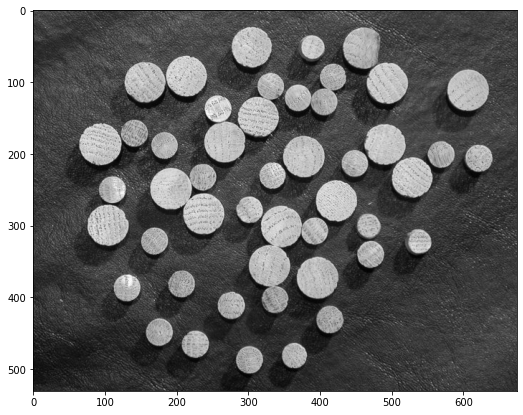

In [ ]:
img5 = Image.open('/content/drive/MyDrive/DIP3E_Original_Images_CH09/Fig0941(a)(wood_dowels).tif')
img5 = np.array(img5)
fig = plt.figure(figsize=(10, 7))
plt.imshow(img5, origin='upper', cmap='gray')

Let's try out granulometry on the image shown above. At first, we need to perform smoothing on the image. The first step will be to perform smoothing on the image to remove any sort of noise. Then, we can apply morphological opening on the image in iterative steps with disks of incremental sizes. Since the images are converted to binary, we can plot a graph of the difference between the previously opened image's sum of all the pixel values vs the currently opened image's sum of all the pixel values. If we see a sharp peak in the graph, we can understand that the difference at that point is very large, which implies that a significant portion of the image's objects have vanished after eroding the image with a disk of that size. And hence we can infer that the circles have a diameter approximately the same as the size of the disk.

In [ ]:
print(np.max(img5))

255


In [ ]:
def to_binary2(image):
    bin_image = np.zeros(image.shape)
    bin_image[image > 127] = 255
    bin_image[image <= 127] = 0
    return bin_image

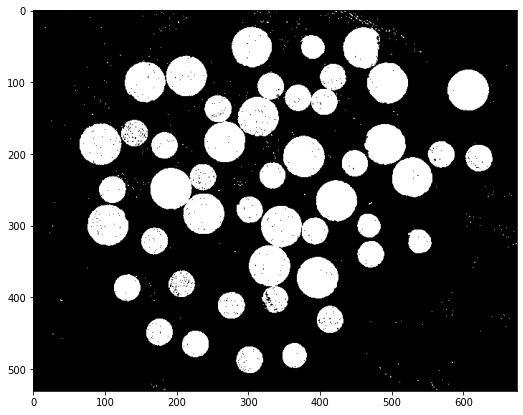

In [ ]:
bin_img5 = to_binary2(img5)
fig = plt.figure(figsize=(10, 7))
plt.imshow(bin_img5, origin='upper', cmap='gray')

In [ ]:
def median_smoothing(image, m):
    image_array = np.array(image)
    M, N = image_array.shape
    padding_dimensions = (M + m - 1, N + m - 1)
    image_originX, image_originY = (m//2, m//2)
    padded_image = np.zeros(padding_dimensions)
    padded_image[image_originX:image_originX + M,image_originY:image_originY + N] = image_array
    smoothed_image_array = np.zeros(image_array.shape)
    for i in range(0, M):
        for j in range(0, N):
            smoothed_image_array[i, j] = np.median(padded_image[i:i + m, j:j + m])
    return smoothed_image_array

The median smoothed version looks something like,

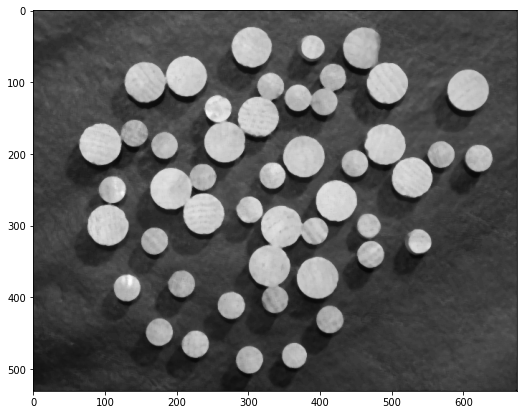

In [ ]:
smoothed_img5 = median_smoothing(img5, 5)
fig = plt.figure(figsize=(10, 7))
plt.imshow(smoothed_img5, origin='upper', cmap='gray')

After this, let's convert the image to binary to clearly see the circles.

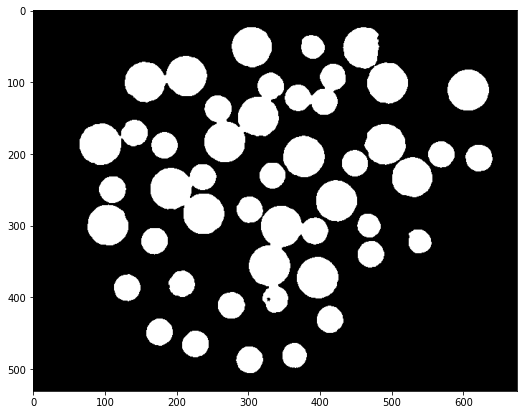

In [ ]:
bin_smoothed_img5 = to_binary2(smoothed_img5)
fig = plt.figure(figsize=(10, 7))
plt.imshow(bin_smoothed_img5, origin='upper', cmap='gray')

The operations the we need for this task are median smoothing and a series of openings. Opening is an operation where the original image is eroded first and then dilated using the same structuring element. Opening generally smoothes the contour of an object, breaks narrow isthmuses, and eliminates thin protrusions. Formally, the opening of set $A$ by structuring element $B$, denoted by $A \circ B$, is defined as,
$$A \circ B = (A \ominus B) \oplus B$$

In [ ]:
def opening(image, SE):
    image = dilation(erosion(image, SE), SE)
    return image

def closing(image, SE):
    image = erosion(dilation(image, SE), SE)
    return image

In [ ]:
op = []
for se_radius in range(10, 35):
    op.append(opening(smoothed_img5, disk(se_radius)))

Now, let's apply opening on this smoothed version with disks of size 10 to 34. Note that here disk size means the supposed radius of the disk. A disk of radius $k$ has the square dimensions of $(2k-1) \times (2k-1)$. Let's see the effect of openings with all 25 of these disks.

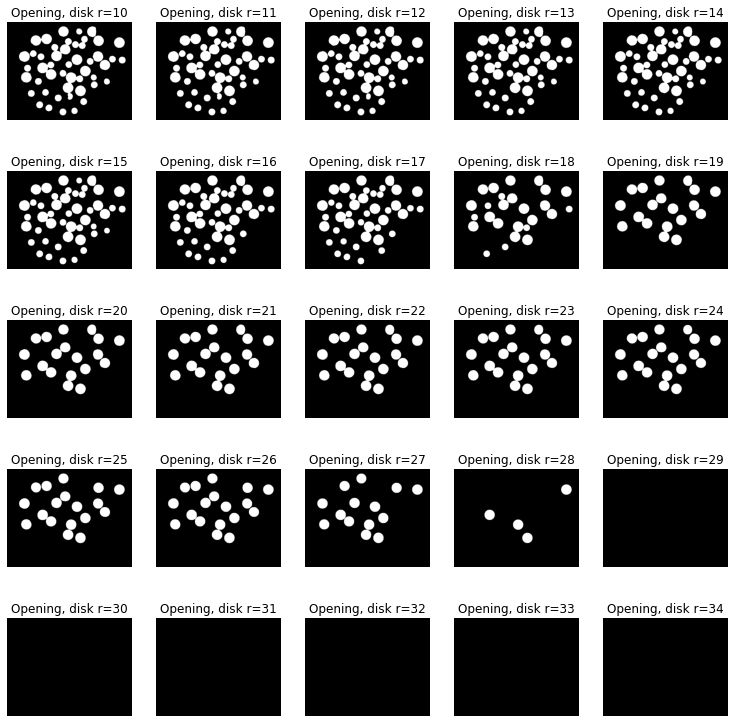

In [ ]:
fig = plt.figure(figsize = (20,20))
plt.subplots_adjust(left=0, bottom=0, right=0.5, top=0.5, wspace=None, hspace=None)
idx = 1
for opImgIdx in range(0, len(op)):
    fig.add_subplot(5, 5, idx)
    plt.imshow(op[opImgIdx], origin='upper', cmap='gray')
    plt.title(f'Opening, disk r={10 + opImgIdx}')
    plt.axis('off')
    opImgIdx+=1
    idx+=1

Here, we can see that the circles progressively vanish as we move on to larger disk sizes. This happens when the disk size is strictly greater than the radius of the circle. From this we can imply there are circles of various shapes in the original image. To be more precise, let's look at the difference of the opened images to see which circles vanish.

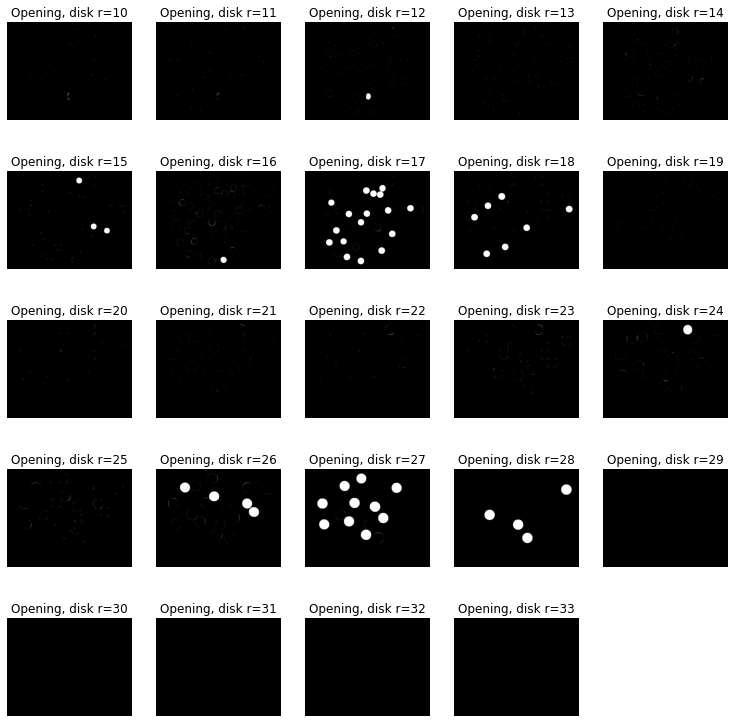

In [ ]:
fig = plt.figure(figsize = (10,10))
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
idx = 1
for opImgIdx in range(0, len(op)-1):
    fig.add_subplot(5, 5, idx)
    plt.imshow(op[opImgIdx] - op[opImgIdx + 1], origin='upper', cmap='gray')
    plt.title(f'Opening, disk r={10 + opImgIdx}')
    plt.axis('off')
    opImgIdx+=1
    idx+=1

As evident from the image difference above, we can see that there are 9 types of circles or wood dowels in the image.

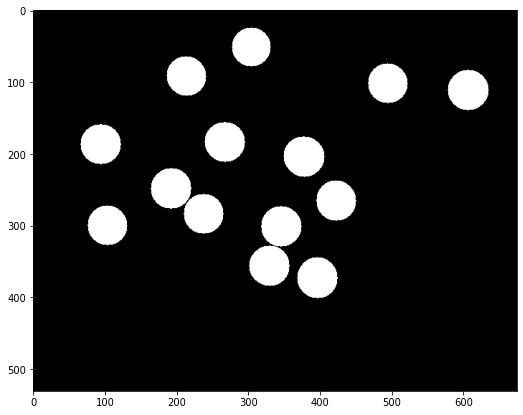

In [ ]:
fig = plt.figure(figsize=(10, 7))
plt.imshow(op[17], origin='upper', cmap='gray')

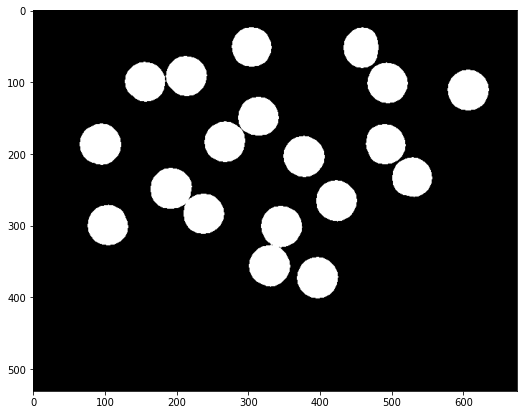

In [ ]:
opened_img = opening(smoothed_img5, disk(20))
fig = plt.figure(figsize=(10, 7))
plt.imshow(opened_img, origin='upper', cmap='gray')

In [ ]:
pixels = []
diffs = [0,0,0,0,0,0,0,0,0,0]
for img in op:
    pixels.append(np.sum(img))
for i in range(1, len(pixels)):
    diffs.append(pixels[i-1]-pixels[i])

The predominant circles are of radius $r \approx 17$ and $r \approx 27$. We can empirically prove that by looking at the peak points of the graph shown below,

In [ ]:
fig = px.line(diffs)
fig.show()

We see peaks at values 17 and 27. This means a significant reduction of white pixels manifested after being opened with circular structured element of radii 17 and 27 respectively.

# Task 3
Complete the solutions to exercise 9.34 of Chapter 09 (Textbook)
Consider the image given, which shows a region of small circles enclosed by a region of larger circles. Locate the boundary between those distinct texture regions.


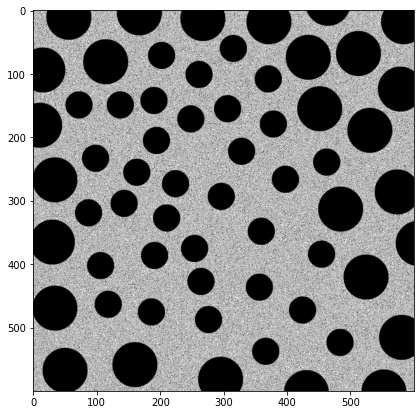

In [ ]:
img4 = Image.open('/content/drive/MyDrive/DIP3E_Original_Images_CH09/FigP0934(blobs_in_circular_arrangement).tif')
img4 = np.array(img4)
fig = plt.figure(figsize=(10, 7))
plt.imshow(img4, origin='upper', cmap='gray')

To obtain the boundary between the big and small blobs we need to perform a series of different morphological image processing techniques on the image. If $A$ is the original image, $B$ is a structuring element of size barely greater than the small blobs, $C$ is a structuring element of size barely greater than the highest distance between large blobs in the original image and $D$ is a circular structuring element of radius 5. Then, to obtain the borders we need to do,
	$$
	    \beta(A) = ((A \boldsymbol{\cdot} B) \circ C) - (((A \boldsymbol{\cdot} B) \circ C) \boldsymbol{\ominus} D)
	$$
	Then, if we superimpose this boundary on the original image we will be able to the boundary tessellate harmoniously between the small and large blobs.

Let's try this sequence of morphological operations on the image in question and see what happens.

In [ ]:
smallBlobsRemoved = closing(img4, disk(22))

After closing this image with an SE of size 22, we get,

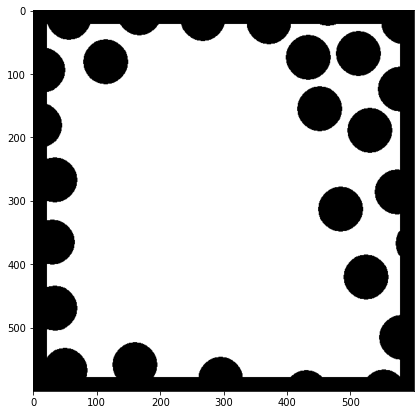

In [ ]:
fig = plt.figure(figsize=(10, 7))
plt.imshow(smallBlobsRemoved, origin='upper', cmap='gray')

In [ ]:
whiteGapsBetweenLargeBlobsRemoved = opening(smallBlobsRemoved, disk(50))

Then, we perform opening to remove the internal white spaces between the large blobs. The SE is a circular disk of radius 50.

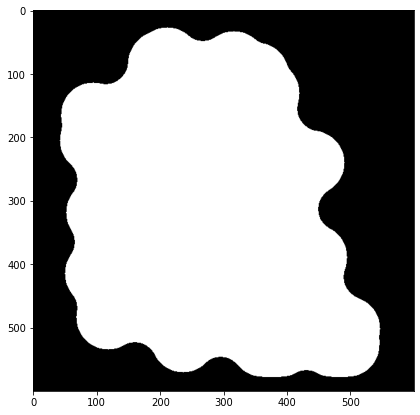

In [ ]:
fig = plt.figure(figsize=(10, 7))
plt.imshow(whiteGapsBetweenLargeBlobsRemoved, origin='upper', cmap='gray')

In [ ]:
boundarySmallBlobsRegion = whiteGapsBetweenLargeBlobsRemoved - erosion(whiteGapsBetweenLargeBlobsRemoved, disk(5))

Let's erode this image with an SE of radius 5 and subtract the eroded image from this image. The result will be the boundary.

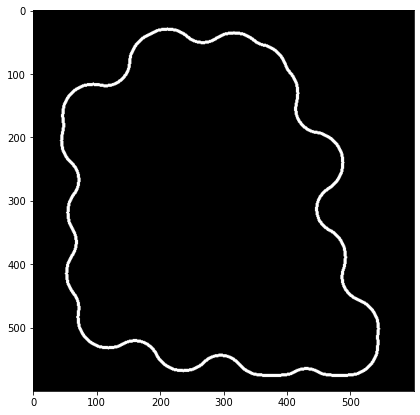

In [ ]:
fig = plt.figure(figsize=(10, 7))
plt.imshow(boundarySmallBlobsRegion, origin='upper', cmap='gray')

In [ ]:
superimposed = np.maximum(boundarySmallBlobsRegion, img4)

Now, let's superimpose this boundary on the original image and see how it turns out.

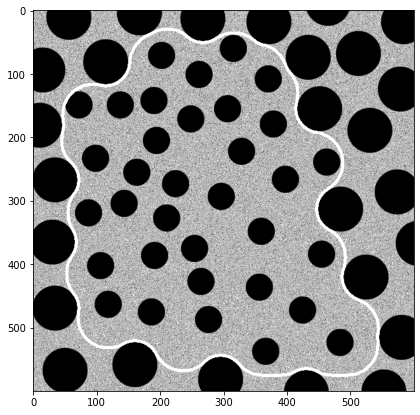

In [ ]:
fig = plt.figure(figsize=(10, 7))
plt.imshow(superimposed, origin='upper', cmap='gray')

As evident from the image above, we can see that the small and large blobs have been perfectly demarcated by the boundary.

# Task 4
Complete the solutions to exercise 9.36 of Chapter 09 (Textbook)
A preprocessing step in an application of microscopy is concerned with the issue of isolating individual round particles from similar particles that overlap in
groups of two or more particles (see following image). Assuming that all particles are of the same size, propose a morphological algorithm that produces three
images consisting respectively of 

(a) Only of particles that have merged with the boundary of the image.

(b) Only overlapping particles.

(c) Only nonoverlapping particles.

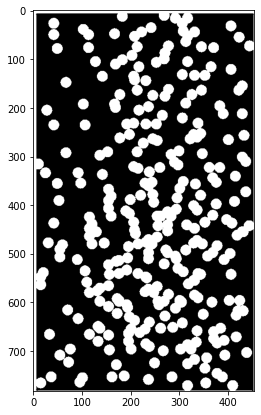

In [ ]:
img3 = Image.open('/content/drive/MyDrive/DIP3E_Original_Images_CH09/FigP0936(bubbles_on_black_background).tif')
img3 = np.array(img3)
fig = plt.figure(figsize=(10, 7))
plt.imshow(img3, origin='upper', cmap='gray')

This task requires us to find the connected components of the image shown above.

Let's take a look at the image from the book first and note down some observations.

Here, we can see that 19 round particles are touching the boundary which itself is a slither of white line. The other connected components or overlapping round particles do not have as much round particles. From this, we can imply that, the largest connected component in the image will have a size close to the size of 19 such connected components added together. This largest connected component will be the 19 round particles as well as the boundary. The particles that are not overlapping must be the size of a single round particle. The rest of the round particles are overlapping and connected with some other particle in some manner.

In [ ]:
print(np.max(img3))

True


In [ ]:
bin_img3 = to_binary(img3)

In [ ]:
print(np.max(bin_img3))

255.0


Now that we have our conditions set, we can perform DFS (Depth-First Search) on the image and find out the connected components.

In [ ]:
SEc = disk(12)
SE_sum = np.sum(SEc)
bin_img3 = to_binary(img3)
bin_img3 = np.array(bin_img3 / 255, dtype='uint16')
bin_img3 = np.pad(bin_img3, 1)
overlap = np.zeros(bin_img3.shape)
nonoverlap = np.zeros(bin_img3.shape)
boundary = np.zeros(bin_img3.shape)
M, N = bin_img3.shape
for i in range(0, M - 1):
    for j in range(0, N - 1):
        if bin_img3[i, j]:
            stack = []
            stack.append((i, j))
            component = set()
            while len(stack):
                vx, vy = stack.pop()
                component.add((vx, vy))
                dIdx = [(-1, -1),(0, -1), (1, -1),
                        (-1, 0), (1, 0),
                        (-1, 1),(0, 1), (1, 1)]
                for (x, y) in dIdx:
                    if bin_img3[vx + x, vy + y] == 1 and (vx + x, vy + y) not in component:
                        component.add((vx + x, vy + y))
                        stack.append((vx + x, vy + y))
            for (x, y) in component:
                if len(component) - SE_sum <= 100:
                    nonoverlap[x, y] = 255
                elif 19*SE_sum > len(component) > SE_sum + 100:
                    overlap[x, y] = 255
                else:
                    boundary[x, y] = 255
                bin_img3[x, y] = 0

The size of disk taken is 12. This was an educated guess of the radius of the round particles in the image. An error margin $\varepsilon = 100$ pixels was considered because of miniscule non-uniformity of the round particles.

The output of the DFS is shown below,

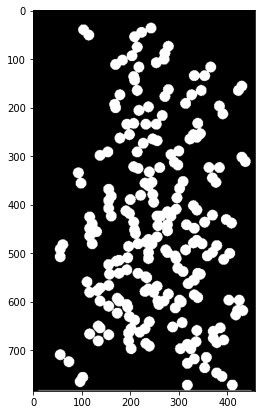

In [ ]:
fig = plt.figure(figsize=(10, 7))
plt.imshow(overlap, origin='upper', cmap='gray')

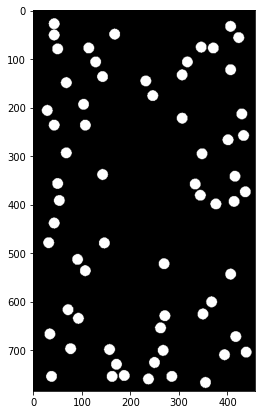

In [ ]:
fig = plt.figure(figsize=(10, 7))
plt.imshow(nonoverlap, origin='upper', cmap='gray')

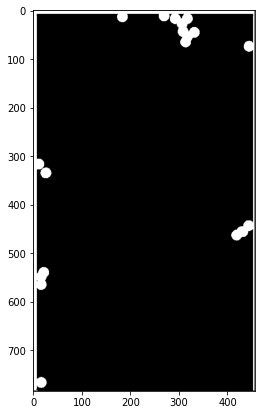

In [ ]:
fig = plt.figure(figsize=(10, 7))
plt.imshow(boundary, origin='upper', cmap='gray')

Text(0.5, 1.0, 'Particles at the boundary')

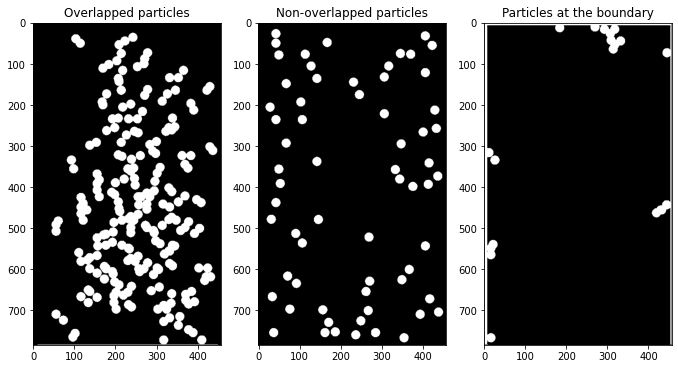

In [ ]:
fig = plt.figure(figsize=(12, 12))
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
# fig.add_subplot(1, 4, 1)
# plt.imshow(img3, origin='upper', cmap='gray')
# plt.title('Original Image')

fig.add_subplot(1, 4, 1)
plt.imshow(overlap, origin='upper', cmap='gray')
plt.title('Overlapped particles')
# plt.axis('off')

fig.add_subplot(1, 4, 2)
plt.imshow(nonoverlap, origin='upper', cmap='gray')
plt.title('Non-overlapped particles')
# plt.axis('off')

fig.add_subplot(1, 4, 3)
plt.imshow(boundary, origin='upper', cmap='gray')
plt.title('Particles at the boundary')
# plt.axis('off')

As evident from the images above, the round particles have been perfectly classified. Two round particles are in the same connected component if they are 8-adjacent to each other. This can be achieved in a similar manner by iterative morphological dilation on the image with a seed point.
    \begin{equation}
        X_k = (X_{k-1} \oplus B) \cap I \quad\quad k=1, 2, 3, \dots
    \end{equation}
Here, $X_0$ is the seed point, $B$ is the structured element and $I$ is the initial original image. The procedure terminates when $X_k = X_{k-1}$, with $X_k$ containing all the connected components of foreground pixels in the image. The output would be the same nevertheless.

In [ ]:
fig = px.imshow(boundary)
fig.show()

We can zoom in and see that all the particles in a connected component is at least 8-adjacent with one another.